In [1]:
# Reference https://www.youtube.com/watch?v=gCWBFyFTxVU
# Dataset https://www.kaggle.com/mlg-ulb/creditcardfraud

import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import pyplot
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go 
from IPython.display import Image
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import seaborn as sns #remove?
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.externals.six import StringIO  
#import pydotplus
from sklearn.ensemble import RandomForestClassifier



import numpy as np
import seaborn as sns

# ml models decistion tree
from sklearn.tree import DecisionTreeClassifier

# One of the Ensemle model -- Random Forset which is ensemple of decision trees
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier

# import logistic regression, SVC  for ensembling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC

# Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# Distance based
from sklearn.neighbors import KNeighborsClassifier

# packages for metric for evalaution of the models
from sklearn import metrics
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix

# to save the models so that we don't need to train the models every time we need to do prediction
from sklearn.externals import joblib

# Rule based classifier
from sklearn.dummy import DummyClassifier

# let's do some moedelling
from sklearn.model_selection import train_test_split, cross_val_score



In [2]:
df = pd.read_csv(r'C:\Users\Adarsh\uOttawa\ML Course Project-7Apr\datasets\6a-combined-text-numeric.csv')


In [3]:
df.head(5)

,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,job_status,post_day,post_month,...,company_apple,company_facebook,company_google,company_microsoft,company_netflix,job_title_num,location_num,feedback_word_count,avg_word_len,sentiment_score
0,4.0,4.0,2.5,4.0,4.5,4.0,0,0,20,3,...,0,0,0,0,0,0.00040,0.068375,88,4.534091,0.124329
1,5.0,5.0,5.0,5.0,5.0,5.0,0,0,31,10,...,1,0,0,0,0,0.00005,0.018650,104,4.336538,0.448133
2,5.0,3.0,5.0,5.0,5.0,5.0,1,0,16,4,...,0,0,0,0,0,0.41015,0.377600,151,4.516556,0.373810
3,3.0,2.0,2.0,3.0,4.0,2.0,2,0,3,1,...,0,0,0,0,0,0.00050,0.068375,153,4.895425,0.199087
4,5.0,5.0,5.0,5.0,5.0,5.0,0,0,27,12,...,0,0,0,0,0,0.41015,0.377600,27,6.370370,0.480000


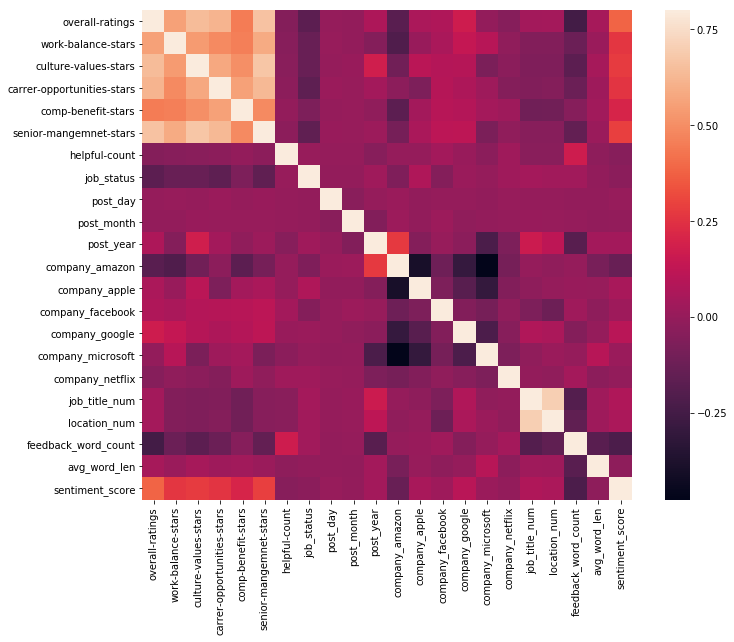

In [4]:
# it can be easily seen, this is also a class imbalance problem
# let's see the correlation between the features
corr_matrix = df.corr()

# plot the correlation matrix's heatmap
fig = plt.figure( figsize= (12, 9 ) )
sns.heatmap(corr_matrix, vmax= .8, square= True )

In [5]:
# Drop some of columns which have high- correlation
X = df[['overall-ratings', 'helpful-count', 'post_day',
       'post_month', 'post_year', 'company_amazon', 'company_apple',
       'company_facebook', 'company_google', 'company_microsoft',
       'company_netflix', 'job_title_num',
       'feedback_word_count', 'avg_word_len', 'sentiment_score']]

Y = df['job_status']


In [6]:
features = ['overall-ratings', 'helpful-count', 'post_day',
       'post_month', 'post_year', 'company_amazon', 'company_apple',
       'company_facebook', 'company_google', 'company_microsoft',
       'company_netflix', 'job_title_num',
       'feedback_word_count', 'avg_word_len', 'sentiment_score']

In [7]:
X.head(2)

,overall-ratings,helpful-count,post_day,post_month,post_year,company_amazon,company_apple,company_facebook,company_google,company_microsoft,company_netflix,job_title_num,feedback_word_count,avg_word_len,sentiment_score
0,4.0,0,20,3,2010,1,0,0,0,0,0,0.00040,88,4.534091,0.124329
1,5.0,0,31,10,2014,0,1,0,0,0,0,0.00005,104,4.336538,0.448133


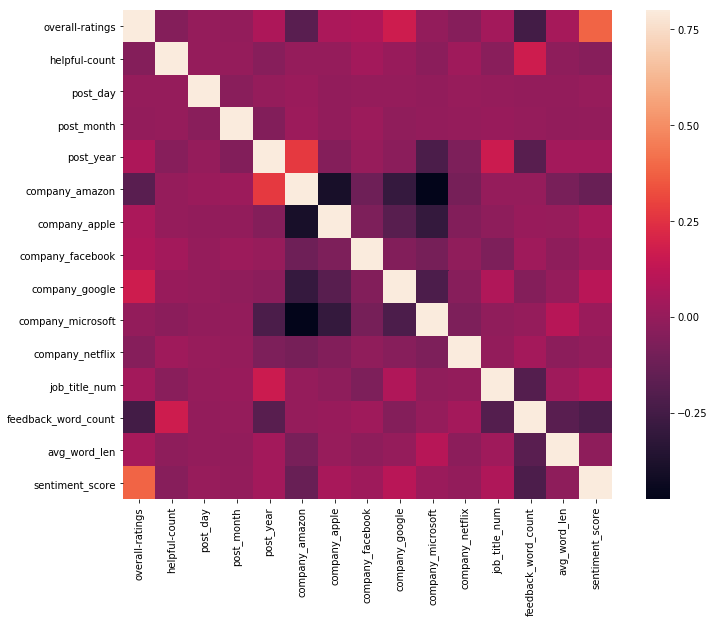

In [8]:
# it can be easily seen, this is also a class imbalance problem
# let's see the correlation between the features
corr_matrix = X.corr()

# plot the correlation matrix's heatmap
fig = plt.figure( figsize= (12, 9 ) )
sns.heatmap(corr_matrix, vmax= .8, square= True )

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2 , random_state = 4)

In [10]:
%%time
# let's try how ensemling ( Random forest wit 10 decision trees ) performs 
random_forest = RandomForestClassifier(n_estimators=10)
random_forest.fit(X_train, y_train)


filepath = r'C:\Users\Adarsh\uOttawa\ML Course Project-7Apr\saved_models\fine_tuned\random_forest_model'
joblib.dump(random_forest ,filepath )

print("Accuracy = ")
print(random_forest.score(X_test, y_test))
print("\n")
y_pred_rf = random_forest.predict(X_test)
print(classification_report(y_test, y_pred_rf))

Accuracy = 
0.726375


              precision    recall  f1-score   support

           0       0.71      0.78      0.74      4010
           1       0.75      0.68      0.71      3990

   micro avg       0.73      0.73      0.73      8000
   macro avg       0.73      0.73      0.73      8000
weighted avg       0.73      0.73      0.73      8000

Wall time: 439 ms


In [11]:
X_train.shape

(32000, 15)

In [12]:
# As we our final chosen model is Random Forest which is performing better accuracy and execution time wise

# let's fine tune it 

feature_name = []
feautre_score = []

for name, score in zip(X_train[features], random_forest.feature_importances_):
    feature_name.append(name)
    feautre_score.append(score)
    print(name, score)

    
data = go.Bar( y = feature_name, x = feautre_score,   orientation = 'h',
    marker = dict(color = 'rgba(0,100,100, 0.5)', line = dict(width = 0.4)))

data = [data]
layout = go.Layout(title = 'Relative Importance of the Features in the Random Forest Classifier',
    barmode='group', bargap=0.1, width=800,height=500,)

fig = go.Figure(data=data, layout=layout)
iplot(fig)


overall-ratings 0.04614813016576853
helpful-count 0.04174047150759144
post_day 0.1286263901373424
post_month 0.09589620883420749
post_year 0.07482617832737123
company_amazon 0.011975029111791016
company_apple 0.007840155907270933
company_facebook 0.0027166217600624624
company_google 0.006228107406380147
company_microsoft 0.007835998511630252
company_netflix 0.0022063379504235134
job_title_num 0.08918137271534521
feedback_word_count 0.15218368356058726
avg_word_len 0.16891544129692837
sentiment_score 0.1636798728072997


# # Random Forest AFter highly correlated features removed and less important features removed


In [13]:
# Drop some of columns which have high- correlation
X = df[['overall-ratings', 'helpful-count', 'post_day',
       'post_month', 'post_year', 'job_title_num',
       'feedback_word_count', 'avg_word_len', 'sentiment_score']]

Y = df['job_status']



In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2 , random_state = 4)

In [15]:
X_train.shape

(32000, 9)

In [16]:
%%time

random_forest = RandomForestClassifier(n_estimators=10)
random_forest.fit(X_train, y_train)

filepath = r'C:\Users\Adarsh\uOttawa\ML Course Project-7Apr\saved_models\fine_tuned\random_forest_final'
joblib.dump(random_forest ,filepath )

print("Accuracy = ")
print(random_forest.score(X_test, y_test))
print("\n")
y_pred_rf = random_forest.predict(X_test)
print(classification_report(y_test, y_pred_rf))

Accuracy = 
0.722125


              precision    recall  f1-score   support

           0       0.70      0.77      0.74      4010
           1       0.75      0.67      0.71      3990

   micro avg       0.72      0.72      0.72      8000
   macro avg       0.72      0.72      0.72      8000
weighted avg       0.72      0.72      0.72      8000

Wall time: 498 ms
